# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [ ]:
import torch
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [ ]:
a = torch.FloatTensor(3, 4)
b = torch.FloatTensor(12,)
print(a)
print(b)


tensor([[ 6.1633e+07,  3.0688e-41, -9.4427e+28,  3.0687e-41],
        [ 2.3822e-44,  0.0000e+00,         nan,         nan],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])
tensor([6.1634e+07, 3.0688e-41, 2.3694e-38, 2.3694e-38, 2.3694e-38, 2.3694e-38,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])


In [ ]:
c = b.view(2, 2, 3)
print(c)



tensor([[[6.1634e+07, 3.0688e-41, 2.3694e-38],
         [2.3694e-38, 2.3694e-38, 2.3694e-38]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]]])


In [ ]:
a[:, 0]

tensor([6.1633e+07, 2.3822e-44, 0.0000e+00])

### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [ ]:
# Ваш код здесь
a = torch.FloatTensor(5, 2)
b = torch.FloatTensor(1, 10)

c = b.view(5, 2)

In [ ]:
a.add(c)

tensor([[1.2327e+08, 6.1377e-41],
        [2.3694e-38, 2.3694e-38],
        [2.3694e-38, 2.3694e-38],
        [1.0842e-19, 3.8177e-05],
        [1.0842e-19, 3.8177e-05]])

In [ ]:
a.sub(c)

tensor([[ 5.1200e+02,  0.0000e+00],
        [-2.3694e-38, -2.3694e-38],
        [-2.3694e-38, -2.3694e-38],
        [-1.0842e-19, -3.8177e-05],
        [-1.0842e-19, -3.8177e-05]])

In [ ]:
a.mul(c)

tensor([[3.7988e+15, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]])

In [ ]:
a.div(c)

tensor([[1.0000e+00, 1.0000e+00],
        [1.1828e-07, 0.0000e+00],
        [1.1828e-07, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]])

### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

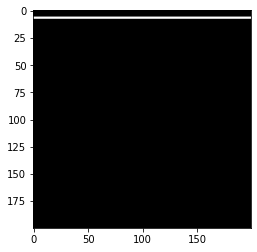

In [ ]:
# Ваш код здесь
images = torch.IntTensor(100, 200, 200, 3).zero_()

for i in range(images.shape[0]):
  images[i, 2 * i: 2 * i + 2, :, :] = 255

plt.imshow(images[3])

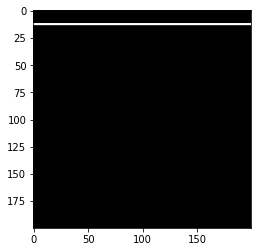

In [ ]:
images = torch.IntTensor(100, 200, 200, 3).zero_()

for i in range(images.shape[0]):
  images[i, 2 * i: 2 * i + 2, :, :] = 255

plt.imshow(images[6])

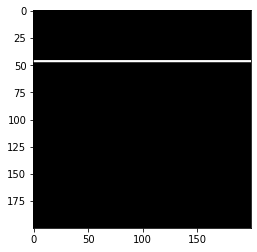

In [ ]:
images = torch.IntTensor(100, 200, 200, 3).zero_()

for i in range(images.shape[0]):
  images[i, 2 * i: 2 * i + 2, :, :] = 255

plt.imshow(images[23])

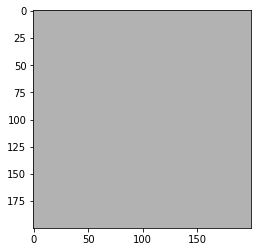

In [ ]:
plt.imshow((images.float().mean(0) * 70).int())

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [ ]:
# Ваш код здесь
a = torch.FloatTensor(2, 3, 4).uniform_().cuda()
b = torch.FloatTensor(1, 8, 3).uniform_().cuda()
print(a)
print(b)


tensor([[[0.4430, 0.7784, 0.9908, 0.3119],
         [0.2260, 0.7568, 0.3507, 0.5872],
         [0.1029, 0.9752, 0.0068, 0.8283]],

        [[0.8513, 0.5356, 0.0918, 0.1244],
         [0.0437, 0.3230, 0.7854, 0.7384],
         [0.1717, 0.0324, 0.8336, 0.9579]]], device='cuda:0')
tensor([[[0.2066, 0.1224, 0.1704],
         [0.4641, 0.2536, 0.6285],
         [0.9720, 0.6978, 0.5325],
         [0.5353, 0.4567, 0.3057],
         [0.7024, 0.2329, 0.0963],
         [0.3133, 0.1005, 0.2688],
         [0.9982, 0.4723, 0.3134],
         [0.6847, 0.6598, 0.3842]]], device='cuda:0')


In [ ]:
c = b.view(a.shape)
print(a.size())
print(c.size())



torch.Size([2, 3, 4])
torch.Size([2, 3, 4])


In [ ]:
from torch.autograd import Variable

c = Variable(c.cpu(), requires_grad=True)
a = Variable(a.cpu())
print(c)
print(a)



tensor([[[0.2066, 0.1224, 0.1704, 0.4641],
         [0.2536, 0.6285, 0.9720, 0.6978],
         [0.5325, 0.5353, 0.4567, 0.3057]],

        [[0.7024, 0.2329, 0.0963, 0.3133],
         [0.1005, 0.2688, 0.9982, 0.4723],
         [0.3134, 0.6847, 0.6598, 0.3842]]], requires_grad=True)
tensor([[[0.4430, 0.7784, 0.9908, 0.3119],
         [0.2260, 0.7568, 0.3507, 0.5872],
         [0.1029, 0.9752, 0.0068, 0.8283]],

        [[0.8513, 0.5356, 0.0918, 0.1244],
         [0.0437, 0.3230, 0.7854, 0.7384],
         [0.1717, 0.0324, 0.8336, 0.9579]]])


In [ ]:
L = torch.mean((c - a)**2)
L.backward()
c.grad

tensor([[[-0.0197, -0.0547, -0.0684,  0.0127],
         [ 0.0023, -0.0107,  0.0518,  0.0092],
         [ 0.0358, -0.0367,  0.0375, -0.0436]],

        [[-0.0124, -0.0252,  0.0004,  0.0157],
         [ 0.0047, -0.0045,  0.0177, -0.0222],
         [ 0.0118,  0.0544, -0.0145, -0.0478]]])